In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

%matplotlib inline

In [2]:
data = pd.read_csv("train.csv")
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


### Checking Duplicates

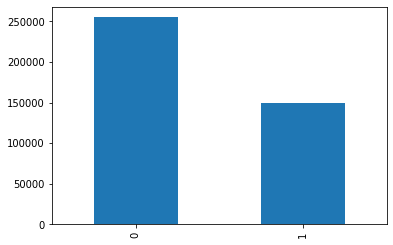

In [3]:
data["is_duplicate"].value_counts().plot.bar()

In [5]:
data["is_duplicate"].value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

In [11]:
data["is_duplicate"].value_counts()[0]/len(data)*100

63.08021469737069

In [20]:
print("Total no of Non-duplicates (is_duplicate = 0) {:.2f}%".format(float(data["is_duplicate"].value_counts()[0]/len(data)*100)))
print("Total no of duplicates (is_duplicate = 1) {:.2f}%".format(float(100-data["is_duplicate"].value_counts()[0]/len(data)*100)))

Total no of Non-duplicates (is_duplicate = 0) 63.08%
Total no of duplicates (is_duplicate = 1) 36.92%


### Checking Unique

In [35]:
# need to find uniques no of questions.Question appear in two columns.So took both the columns 
#and sum them into a series column and checked the unique values of that column to get the unique questions.

qids = pd.Series(data['qid1'].tolist() + data['qid2'].tolist())
unique_qs = len(np.unique(qids))
print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))


Total number of  Unique Questions are: 537933



### Cheking Frequency or Unique and Repeated questions

In [44]:
##Get the value counts of each question id i.e how many times each id occurs
qids.value_counts()

2559      157
30782     120
4044      111
2561       88
14376      79
         ... 
75109       1
81254       1
85352       1
83305       1
168274      1
Length: 537933, dtype: int64

We can see qid 157 occues max time and qid 168274 and others occurs minimum time i.e 1 time

In [55]:
print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 
print ('Min number of times a single question is repeated: {}\n'.format(min(qids.value_counts()))) 


Max number of times a single question is repeated: 157

Min number of times a single question is repeated: 1



In [54]:

qs_morethan_onetime= np.sum(qids.value_counts() > 1)

print ('Number of unique questions that appear more than one time: {} ({:.2f}%)\n'
       .format(qs_morethan_onetime,qs_morethan_onetime/unique_qs*100))


Number of unique questions that appear more than one time: 111780 (20.78%)



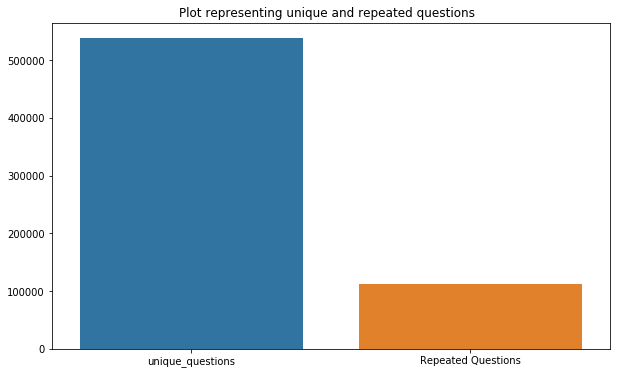

In [58]:
x = ["unique_questions" , "Repeated Questions"]
y =  [unique_qs , qs_morethan_onetime]

plt.figure(figsize=(10, 6))
plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x,y)
plt.show()

### Checking pair wise duplicates

We want to check if the same qid1 and qid2 exists for more than 1 time or not. For example, qid1=5, qid2=7, how many times this pair occurs in the data. 

In [81]:
#checking whether there are any repeated pair of questions

#grouping pair wise
pair_duplicates = data.groupby(['qid1','qid2']).count().reset_index()

# Subtracting the length of pair wise data and non-pairwise data.Since both the length same so 0 comes i.e no extra line
#for grouping pair wise i.e No Duplicates
print ("Number of duplicate questions",(pair_duplicates).shape[0] - data.shape[0])

Number of duplicate questions 0


Checking the frequency of occurence of each questions

Using Log because being a monotonic function it will give the same output as using the original scale. It reduces the sparsity and makes the plot more dense thus easy to visualize the frequency. 

### Frequency of occurence of each Qid on log scale

Maximum number of times a single question is repeated: 157



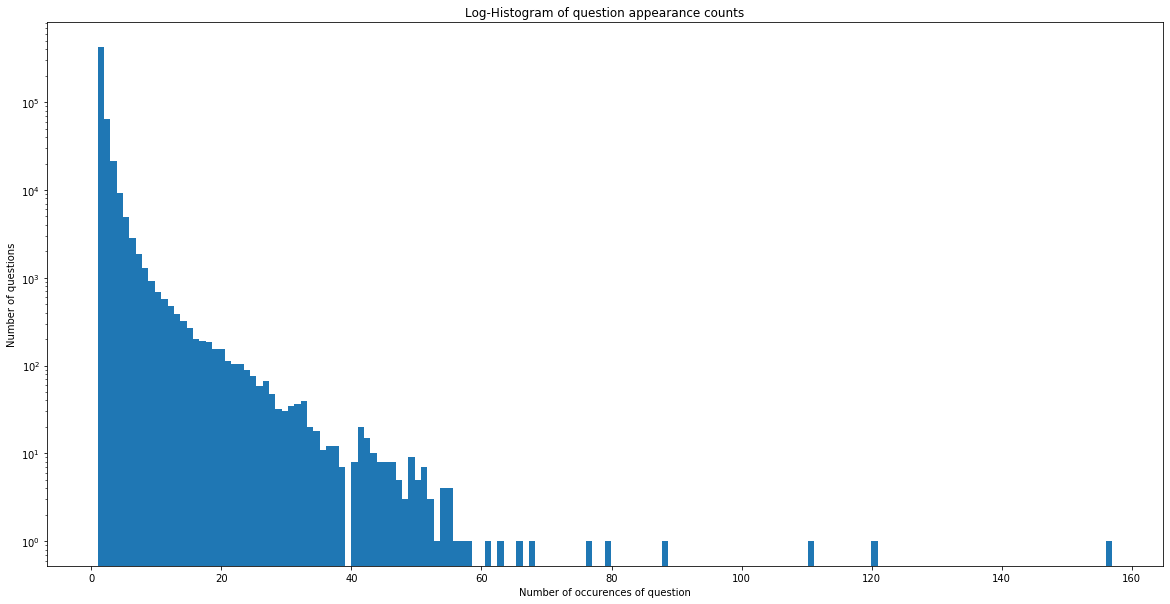

In [82]:


plt.figure(figsize=(20, 10))

plt.hist(qids.value_counts(), bins=160)

#As log is undefined for negative numbers, nonposy means non positive numbers when appears is clipped.
plt.yscale('log', nonposy='clip')

plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Number of occurences of question')

plt.ylabel('Number of questions')

print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

As we can see from the plot 157 no question has occured once as log(10^0)=1. And Maximum question occurs only once.

### Check Null values

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404289 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


Thus we can see question1  question2 columns have null values.


In [92]:
#Checking whether there are any rows with null values
nan_rows = data[data.isnull().any(1)]
nan_rows

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


In [130]:
# Filling the null values with ' '
data = data.fillna('')
nan_rows = data[data.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate, freq_qid1, freq_qid2, q1len, q2len, q1_n_words, q2_n_words]
Index: []


### Basic Feature Extraction (before cleaning) 

Let us now construct a few features like:
 - ____freq_qid1____ = Frequency of qid1's
 - ____freq_qid2____ = Frequency of qid2's 
 - ____q1len____ = Length of q1
 - ____q2len____ = Length of q2
 - ____q1_n_words____ = Number of words in Question 1
 - ____q2_n_words____ = Number of words in Question 2
 - ____word_Common____ = (Number of common unique words in Question 1 and Question 2)
 - ____word_Total____ =(Total num of words in Question 1 + Total num of words in Question 2)
 - ____word_share____ = (word_common)/(word_Total)
 - ____freq_q1+freq_q2____ = sum total of frequency of qid1 and qid2 
 - ____freq_q1-freq_q2____ = absolute difference of frequency of qid1 and qid2 

##### freq_qid1 = Frequency of qid1's    
##### freq_qid2 = Frequency of qid2's


In [132]:
data['freq_qid1'] = data.groupby('qid1')['qid1'].transform('count') 
data['freq_qid2'] = data.groupby('qid2')['qid2'].transform('count')

In [133]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7


It means qid1 of '1' has occured '1 time'.qid1 of '3'  has occured '4 times' and so on

##### q1len= Length of q1
##### q2len= Length of q2

In [134]:
data['q1len'] = data['question1'].str.len() 
data['q2len'] = data['question2'].str.len()

In [135]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7


Here it is giving the string length of each question.

##### q1_n_words = Number of words in Question 1
##### q2_n_words= Number of words in Question 2

In [136]:
data['q1_n_words'] = data['question1'].str.split().str.len()
data['q2_n_words'] = data['question2'].str.split().str.len()



In [137]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7


##### word_Common = (Number of common unique words in Question 1 and Question 2)

In [138]:
    def normalized_word_Common(row):
        
        #split() created iterator i.e the list of words and strip() removed the whitespaces
        #set() gave the unique words and remove duplicates
        
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))  
        
        # & picked the common words in both the list of w1 and w2 and gave the length i.e the numbers
        return 1.0 * len(w1 & w2)
    data['word_Common'] = data.apply(normalized_word_Common, axis=1)

In [139]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0


##### word_Total=(Total num of words in Question 1 + Total num of words in Question 2)

In [140]:
    def normalized_word_Total(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * (len(w1) + len(w2))
    data['word_Total'] = data.apply(normalized_word_Total, axis=1)

In [141]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0


##### word_share = (word_common)/(word_Total)

In [143]:
    def normalized_word_share(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
    data['word_share'] = data.apply(normalized_word_share, axis=1)
    
# or 

#data["word_share"] = data["word_Common"]/data["word_Total"]
    

In [145]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000


##### freq_q1     + / -     freq_q2 = sum total of frequency of qid1 and qid2 

In [146]:
data['freq_q1+q2'] = data['freq_qid1']+data['freq_qid2']
data['freq_q1-q2'] = abs(data['freq_qid1']-data['freq_qid2'])
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


##### Save the basic feature extraction file into a csv

In [147]:
data.to_csv("df_fe_without_preprocessing_train.csv", index=False)
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


### Analysis of Extracted Features

##### word_share

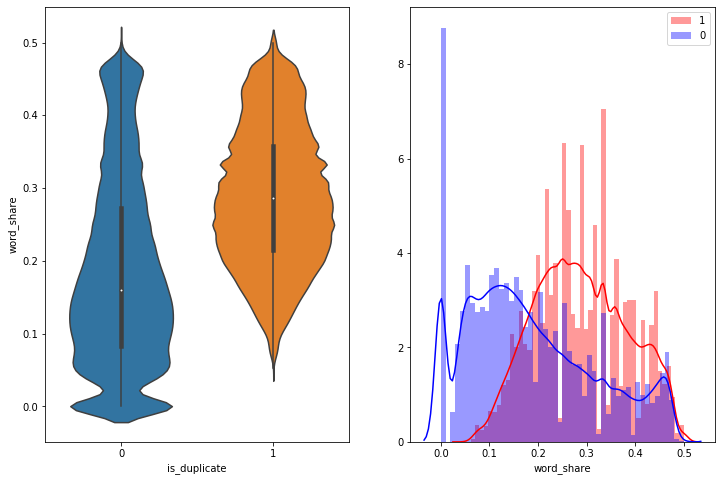

In [152]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = data[0:])

plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'red').legend()
sns.distplot(data[data['is_duplicate'] == 0.0]['word_share'][0:] , label = "0" , color = 'blue' ).legend()
plt.show()


- **Violin plot:** In the violin plot we can see both classes have different distribution nature of their pdf. Also importantly the box plots do not overlap that means the classification can be achieved by this feature to some extent.So the feature is useful.


- **Dist plot:**Here we can see in distribution plot the pdfs are not fully overlapping.There is some common region but some region is also present that seperates the bothe classes.That means this feature is able to classify the classes to some extent.If the pdfs were overlapping then this feature should have been dropped because it can not serve the purpose of classification.  

##### word_common

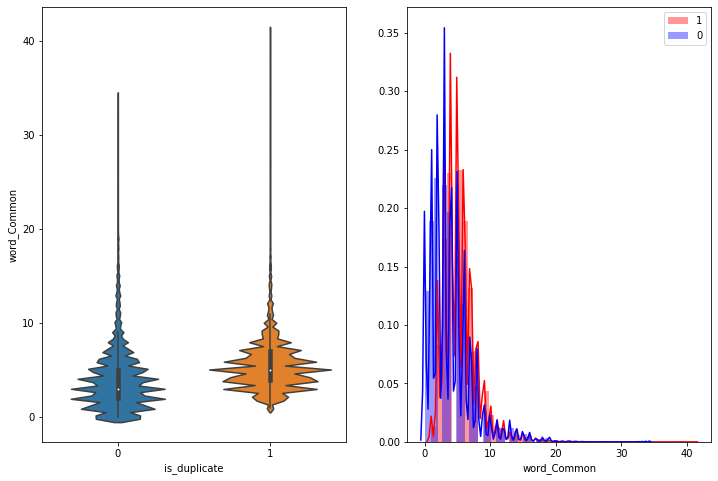

In [154]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_Common', data = data[0:])

plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate'] == 1.0]['word_Common'][0:] , label = "1", color = 'red').legend()
sns.distplot(data[data['is_duplicate'] == 0.0]['word_Common'][0:] , label = "0" , color = 'blue' ).legend()
plt.show()

From the both we can see there is highly ovelapping so this feature is not suitable for clasification.

##### word_Total

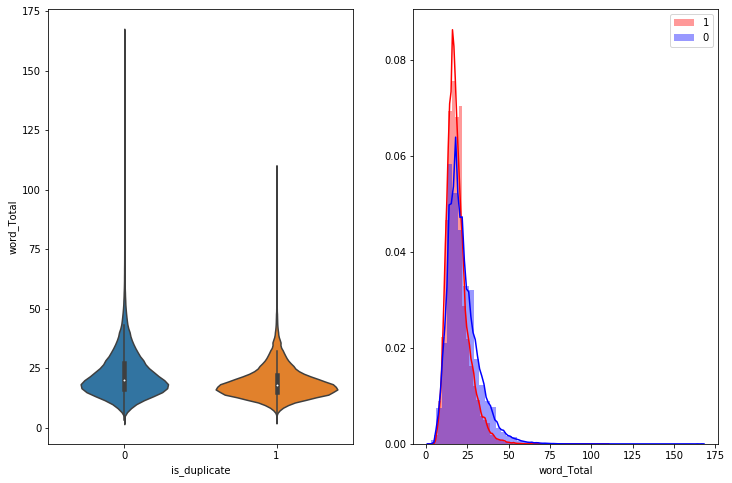

In [155]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_Total', data = data[0:])

plt.subplot(1,2,2)
sns.distplot(data[data['is_duplicate'] == 1.0]['word_Total'][0:] , label = "1", color = 'red').legend()
sns.distplot(data[data['is_duplicate'] == 0.0]['word_Total'][0:] , label = "0" , color = 'blue' ).legend()
plt.show()

From the both we can see there is highly ovelapping so this feature is not suitable for clasification.

We can check all the extracted features and will find none of the left features are serving the purpose of classification like that of 'word_share' feature

**Word_share** is the most important feature for classification

### Checking Correlation

Since the extarcted features are constructed based on arithmatic opertaions so there is a lot of correlation between the extracted features as we can see in the hatmap

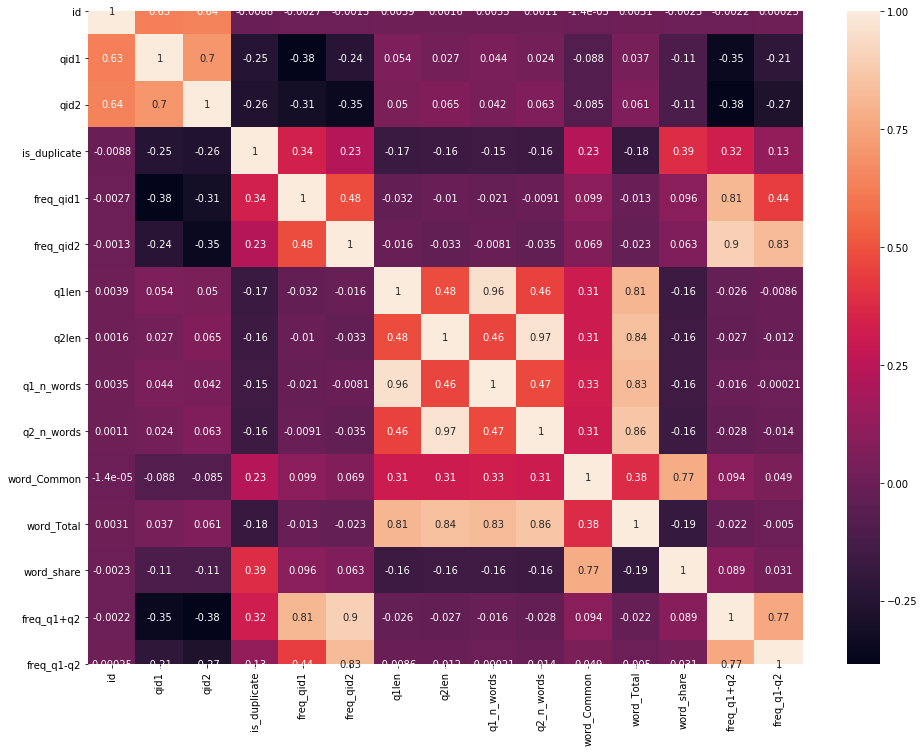

In [160]:
dataCorr = data.corr()

plt.figure(figsize = (16,12))

sns.heatmap(dataCorr,annot = True)

## Text Preprocessing

In [52]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import re

- Preprocessing:
    - Removing html tags 
    - Removing Punctuations
    - Performing stemming
    - Removing Stopwords
    - Expanding contractions etc.

In [53]:
# To get the results in 4 decimal points
SAFE_DIV = 0.0001 

STOP_WORDS = stopwords.words("english")



# Deconractions

def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    
    ## Stemming
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x
    

### Advanced Feature Extraction (NLP and Fuzzy Features)

Definition:
- __Token__: You get a token by splitting sentence a space
- __Stop_Word__ : stop words as per NLTK.
- __Word__ : A token that is not a stop_word


Features:
- __cwc_min__ :(common word count minimum)  Ratio of common_word_count to min lenghth of word count of Q1 and Q2 <br>cwc_min = common_word_count / (min(len(q1_words), len(q2_words))
<br>
<br>
- __cwc_max__ : (common word count maximum) Ratio of common_word_count to max lenghth of word count of Q1 and Q2 <br>cwc_max = common_word_count / (max(len(q1_words), len(q2_words))
<br>
<br>
- __csc_min__ : (common stopword count minimum) Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2 <br> csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))
<br>
<br>
- __csc_max__ : (common stopword count maximum) Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2<br>csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))
<br>
<br>
- __ctc_min__ : (common token count minimum) Ratio of common_token_count to min lenghth of token count of Q1 and Q2<br>ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))
<br>
<br>

- __ctc_max__ : (common token count maximum)  Ratio of common_token_count to max lenghth of token count of Q1 and Q2<br>ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))
<br>
<br>
        
- __last_word_eq__ : (last word equivalent) Check if last word of both questions is equal or not<br>last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])
<br>
<br>

- __first_word_eq__ : (first word equivalent)  Check if First word of both questions is equal or not<br>first_word_eq = int(q1_tokens[0] == q2_tokens[0])
<br>
<br>
        
- __abs_len_diff__ : (length difference between tokens of each pair) Abs. length difference<br>abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))
<br>
<br>

- __mean_len__ : (Average length of tokens of each pair) Average Token Length of both Questions<br>mean_len = (len(q1_tokens) + len(q2_tokens))/2
<br>
<br>


- __fuzz_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/


It computes the editable distance i.e how different is each word in the pair of sentence and how much edit is needed to make them look same.
<br>
<br>


- __fuzz_partial_ratio__ :  https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/

It computes the all possible fuzz ratio of the two strings and returns the highest value.
<br>
<br>


- __token_sort_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/

The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and then joining them back into a string.Then we calculate the fuzz ratio of the new transformed string
<br>
<br>


- __token_set_ratio__ : https://github.com/seatgeek/fuzzywuzzy#usage
http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/

 Here, we tokenize both strings, but instead of immediately sorting and comparing, we split the tokens into two groups: intersection and remainder. We use those sets to build up a comparison string.  
t0 = [SORTED_INTERSECTION]  
t1 = [SORTED_INTERSECTION] + [SORTED_REST_OF_STRING1]  
t2 = [SORTED_INTERSECTION] + [SORTED_REST_OF_STRING2]  
for each pair (t0,t1),(t0,t2). . .so on we compute the fuzz ratio and return the highest fuzz ratio value.

<br>
<br>





- __longest_substr_ratio__ :  Ratio of length longest common substring to min lenghth of token count of Q1 and Q2<br>longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))

Here we compare the longest substring that is common between the two sentences and then divide it by the min length of token between the two sentences.

In [46]:


def get_token_features(q1, q2):
    
    
    token_features = [0.0]*10
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    # If no token is present then return [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    
    
    
    # Get the set of non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    
    
    #Get the set of stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    #cwc_min
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    #cwc_max
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    #csc_min
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    #csc_max
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    #ctc_min
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    #ctc_max
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not (boolean if yes then 1 else 0)
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not (boolean if yes then 1 else 0)
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    #length difference between tokens of each pair
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions 
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features




In [47]:
# get the Longest Common sub string

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

In [48]:

from fuzzywuzzy import fuzz
import timeit
import distance

#Using slow pure-python SequenceMatcher for fuzzywuzzy . Install python-Levenshtein to remove this warning
#pip install Levenshtein

def extract_features(df):
    
    start = timeit.default_timer()
    
    
    
    
    # preprocessing each question (Applying all preprocess steps i.e stemming . . .etc)
    df["question1"] = df["question1"].fillna("").apply(preprocess)
    df["question2"] = df["question2"].fillna("").apply(preprocess)

    print("token features...")
    
    
    #Applying the method to create new features (get_token_features method)
    
    token_features = df.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1)
    
    # Merging Features with dataset
    
    # fist item in token_features list is cwc_min ,next is cwc_max and so on......
    #create a column for each item/feature
    
    df["cwc_min"]       = list(map(lambda x: x[0], token_features))
    df["cwc_max"]       = list(map(lambda x: x[1], token_features))
    df["csc_min"]       = list(map(lambda x: x[2], token_features))
    df["csc_max"]       = list(map(lambda x: x[3], token_features))
    df["ctc_min"]       = list(map(lambda x: x[4], token_features))
    df["ctc_max"]       = list(map(lambda x: x[5], token_features))
    df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    df["mean_len"]      = list(map(lambda x: x[9], token_features))
    
    
    
    print("token features \n",token_features)
    print("token features \n",len(token_features))
   



    print("fuzzy features..")

    #Applying the method to create fuzzy features and merging in datasets
    
    df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    
    # The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and 
    # then joining them back into a string We then compare the transformed strings with a simple ratio().
    df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    
    df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
    
    df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    
    df["longest_substr_ratio"]  = df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    
    
    

    
    stop = timeit.default_timer()
    print('Time: ', stop - start) 

    return df

In [49]:
data = pd.read_csv("df_fe_without_preprocessing_train.csv")

In [50]:
data.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3


In [54]:
print("Extracting features for train:") 
data = extract_features(data)


Extracting features for train:
token features...
fuzzy features..
0         [0.999980000399992, 0.8333194446759221, 0.9999...
1         [0.7999840003199936, 0.39999600003999963, 0.74...
2         [0.3999920001599968, 0.3333277778703688, 0.399...
3             [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, 0, 2, 12.0]
4         [0.3999920001599968, 0.19999800001999982, 0.99...
                                ...                        
404285    [0.8571306124198226, 0.8571306124198226, 0.999...
404286    [0.6666444451851604, 0.6666444451851604, 0.599...
404287    [0.9999000099990001, 0.49997500124993743, 0.99...
404288    [0.0, 0.0, 0.124998437519531, 0.09999900000999...
404289    [0.9999666677777407, 0.9999666677777407, 0.999...
Length: 404290, dtype: object
Time:  1129.703144430001


In [55]:
print("total time taken {} min".format((float(1129.70)/60)))

total time taken 18.828333333333333 min


In [56]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,1,1,66,57,...,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,4,1,51,88,...,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,1,1,73,59,...,0.285712,0.0,1.0,4.0,12.0,66,66,54,54,0.166667
3,3,7,8,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0,1,1,50,65,...,0.000000,0.0,0.0,2.0,12.0,36,36,35,40,0.039216
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,3,1,76,39,...,0.307690,0.0,1.0,6.0,10.0,67,47,46,56,0.175000


In [57]:
data.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'word_Common', 'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2',
       'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio'],
      dtype='object')

In [58]:
data = data.drop(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'word_Common', 'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2'],axis = 1)

data.to_csv("df_adv_fe.csv", index=False)

In [59]:
data.head(3)

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,66,66,54,54,0.166667


##### Drop the basic feature extractions

In [183]:
df = data.copy()

In [184]:
df = df.drop(['freq_qid1', 'freq_qid2', 'q1len', 'q2len', 'q1_n_words', 'q2_n_words',
       'word_Common', 'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2'],axis=1)

In [186]:
df.head(3)

,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,...,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,0.799984,0.399996,0.749981,0.599988,...,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,0.399992,0.333328,0.399992,0.249997,...,0.285712,0.0,1.0,4.0,12.0,63,63,43,47,0.166667


### Creating Word Cloud

In [192]:
df_duplicate = df[df['is_duplicate'] == 1]
dfp_nonduplicate = df[df['is_duplicate'] == 0]

# Converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}} to {1,2,3,4}
p = np.dstack([df_duplicate["question1"], df_duplicate["question2"]]).flatten()
n = np.dstack([dfp_nonduplicate["question1"], dfp_nonduplicate["question2"]]).flatten()

print ("Number of data points in class 1 (duplicate pairs) :",len(p))
print ("Number of data points in class 0 (non duplicate pairs) :",len(n))

#Saving the np array into a text file
np.savetxt('train_p.txt', p,fmt='%s',encoding='utf-8')
np.savetxt('train_n.txt', n,fmt='%s',encoding='utf-8')

Number of data points in class 1 (duplicate pairs) : 298526
Number of data points in class 0 (non duplicate pairs) : 510054


In [198]:
from os import path
from wordcloud import WordCloud, STOPWORDS

# reading the text files and removing the Stop Words:
d = path.dirname('.')

textp_w = open(path.join(d, 'train_p.txt'),encoding='utf-8').read()
textn_w = open(path.join(d, 'train_n.txt'),encoding='utf-8').read()
stopwords = set(STOPWORDS)
stopwords.add("said")
stopwords.add("br")
stopwords.add(" ")
stopwords.remove("not")

stopwords.remove("no")
#stopwords.remove("good")
#stopwords.remove("love")
stopwords.remove("like")
#stopwords.remove("best")
#stopwords.remove("!")
print ("Total number of words in duplicate pair questions :",len(textp_w))
print ("Total number of words in non duplicate pair questions :",len(textn_w))

Total number of words in duplicate pair questions : 16109886
Total number of words in non duplicate pair questions : 33193067


##### Word Cloud for Duplicate pairs

Word Cloud for Duplicate Question pairs


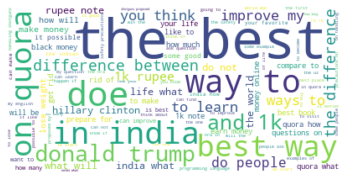

In [199]:
wc = WordCloud(background_color="white", max_words=len(textp_w), stopwords=stopwords)
wc.generate(textp_w)
print ("Word Cloud for Duplicate Question pairs")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

##### Word Cloud for Non Duplicate pairs

Word Cloud for non-Duplicate Question pairs:


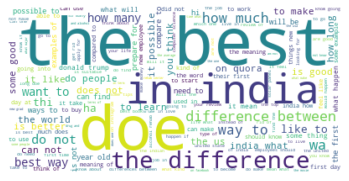

In [200]:
wc = WordCloud(background_color="white", max_words=len(textn_w),stopwords=stopwords)
# generate word cloud
wc.generate(textn_w)
print ("Word Cloud for non-Duplicate Question pairs:")
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Pair plot of features ['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'] 

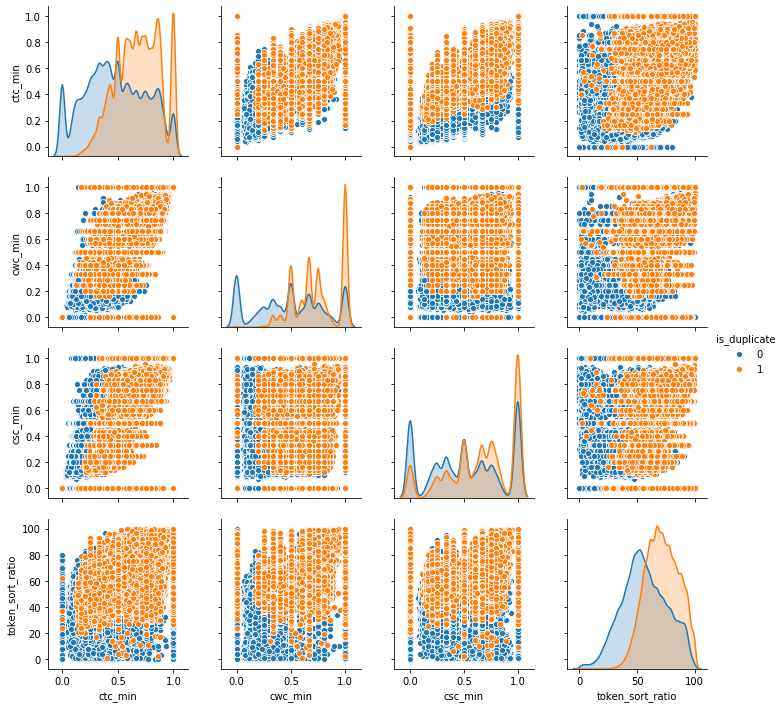

In [201]:
n = df.shape[0]
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']][0:n], hue='is_duplicate', vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])
plt.show()

Doing bi-variate analysis shows most of the features are successful in sperating both the classes. If we see diagonally then it shows each feature can seperate classes to some extent.


Doing uni-variate analysis also shows that each new feature is capable of classifying and hence has some importance.

##### token_sort_ratio

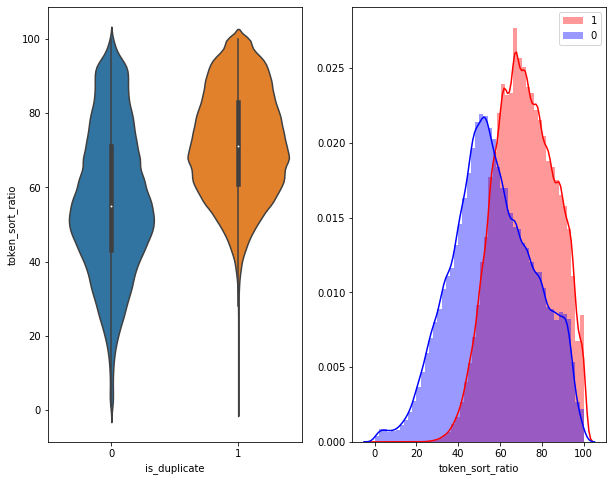

In [203]:
# Distribution of the token_sort_ratio
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'token_sort_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['token_sort_ratio'][0:] , label = "1", color = 'red').legend()
sns.distplot(df[df['is_duplicate'] == 0.0]['token_sort_ratio'][0:] , label = "0" , color = 'blue' ).legend()
plt.show()





##### fuzz_ratio

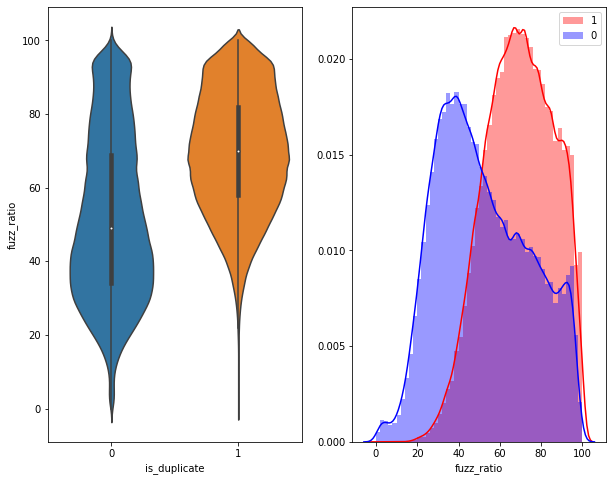

In [204]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'red').legend()
sns.distplot(df[df['is_duplicate'] == 0.0]['fuzz_ratio'][0:] , label = "0" , color = 'blue' ).legend()
plt.show()

##### longest_substr_ratio

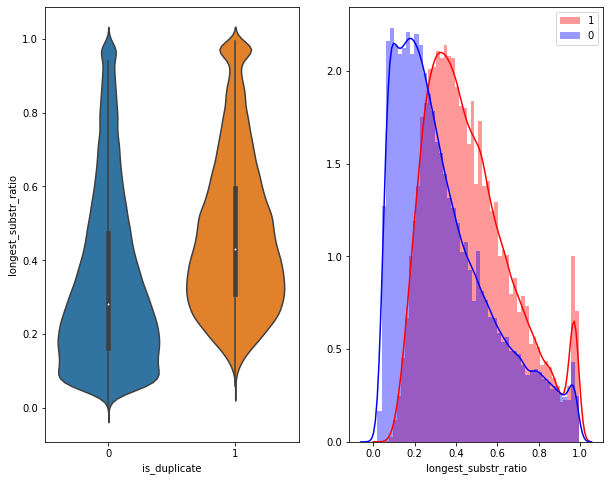

In [205]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'longest_substr_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['longest_substr_ratio'][0:] , label = "1", color = 'red').legend()
sns.distplot(df[df['is_duplicate'] == 0.0]['longest_substr_ratio'][0:] , label = "0" , color = 'blue' ).legend()
plt.show()

### Feature Scaling before applying TSNE

In [206]:
# Using TSNE for Dimentionality reduction for the new 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

## taken 5000 samples
dfp_subsampled = df[0:5000]
X = MinMaxScaler().fit_transform(dfp_subsampled[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 
                                                 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 
                                                 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 
                                                 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = dfp_subsampled['is_duplicate'].values

### Visulaising

In [208]:
from sklearn.manifold import TSNE


tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=1,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.088s...
[t-SNE] Computed neighbors for 5000 samples in 0.620s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.130446
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.622238
[t-SNE] KL divergence after 1000 iterations: 0.961501


c:\users\akash\appdata\local\programs\python\python37\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


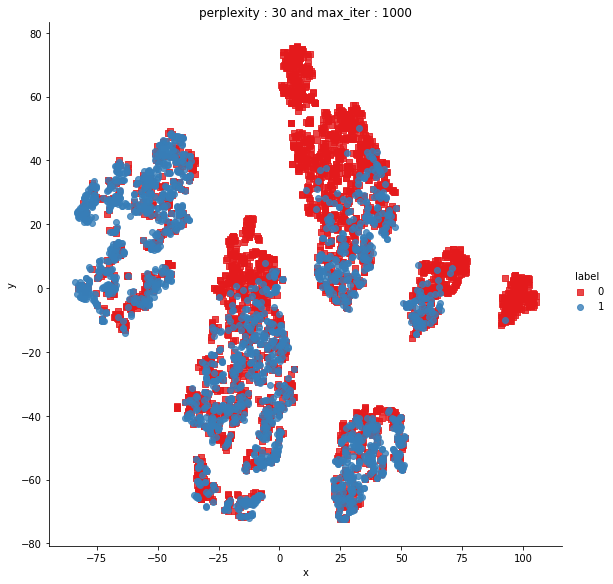

In [209]:
df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()

In [210]:
from sklearn.manifold import TSNE
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.055s...
[t-SNE] Computed neighbors for 5000 samples in 0.642s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.130446
[t-SNE] Computed conditional probabilities in 0.353s
[t-SNE] Iteration 50: error = 80.5739899, gradient norm = 0.0296227 (50 iterations in 7.576s)
[t-SNE] Iteration 100: error = 69.4174042, gradient norm = 0.0032491 (50 iterations in 4.342s)
[t-SNE] Iteration 150: error = 68.0031281, gradient norm = 0.0017356 (50 iterations in 4.084s)
[t-SNE] Iteration 200: error = 67.4430008, gradient norm = 0.0010772 (50 iterations in 4.000s)
[t-SNE] Iteration 250: error = 67.1309662, gradient norm = 0.0008710

In [215]:
import plotly.graph_objs as go
import plotly.offline as py




trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=600, width=600, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')


Applying TSNE with the only new features shows there is some seperation of points.

In [225]:
df_basic = pd.read_csv("df_fe_without_preprocessing_train.csv")
df_basic.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3


In [227]:
df_basic.shape

(404290, 17)

In [229]:
df_advance = data.copy()
df_advance.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,1,1,66,57,...,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,4,1,51,88,...,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154


### NLP Features

So far we have done feature engineering to extract new features. Now we wil use the original features i.e the text data and vectorize it before feeding into model.

In [5]:
df = pd.read_csv("train.csv")
df.shape

(404290, 6)

In [6]:
df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))

In [7]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [8]:
# Filling the null values with ' '
df = df.fillna('')
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


In [9]:
#Solving for contractions

#you've -> you have
#he's -> he is


def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [10]:
#Our customised stopword list corpus

stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])


In [15]:



import re
from bs4 import BeautifulSoup

preprocessed_question1 = []

# tqdm is for printing the status bar

for sentance in tqdm(df['question1'].values):
    sentance = re.sub(r"http\S+", "", sentance)  #removing url
    sentance = BeautifulSoup(sentance, 'lxml').get_text()  #removing Tags
    sentance = decontracted(sentance) #removing contractions
    sentance = re.sub("\S*\d\S*", "", sentance).strip() #removing words having numbers
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)  #removing special characters
    # https://gist.github.com/sebleier/554280
    
    #instead of tokenize we can use split() before removing stopwords
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords) #removing stopwords and in lowercase
    preprocessed_question1.append(sentance.strip()) #strip() to remove any leading or trailing spaces for each sentence/review

  1%|▌                                                                         | 3288/404290 [00:02<04:25, 1511.12it/s]C:\Users\AKASH\AppData\Roaming\Python\Python37\site-packages\bs4\__init__.py:302: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
100%|████████████████████████████████████████████████████████████████████████| 404290/404290 [03:50<00:00, 1756.30it/s]


In [11]:

preprocessed_question2 = []

# tqdm is for printing the status bar

for sentance in tqdm(df['question2'].values):
    sentance = re.sub(r"http\S+", "", sentance)  #removing url
    sentance = BeautifulSoup(sentance, 'lxml').get_text()  #removing Tags
    sentance = decontracted(sentance) #removing contractions
    sentance = re.sub("\S*\d\S*", "", sentance).strip() #removing words having numbers
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)  #removing special characters
    # https://gist.github.com/sebleier/554280
    
    #instead of tokenize we can use split() before removing stopwords
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords) #removing stopwords and in lowercase
    preprocessed_question2.append(sentance.strip()) #strip() to remove any leading or trailing spaces for each sentence/review

100%|████████████████████████████████████████████████████████████████████████| 404290/404290 [03:27<00:00, 1951.26it/s]


Here we compute TFIDF and tfidf weighted word2vec before splitting the data. But, usually we apply tfidf after splitting data (test/ CV/ train DS) to take care of data leakage. 

### Creating a corpus with tf-idf

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


In [16]:
preprocessed_question1

['step step guide invest share market india',
 'story kohinoor koh noor diamond',
 'increase speed internet connection using vpn',
 'mentally lonely solve',
 'one dissolve water quikly sugar salt methane carbon di oxide',
 'astrology capricorn sun cap moon cap rising say',
 'buy tiago',
 'good geologist',
 'use instead',
 'motorola company hack charter motorolla',
 'method find separation slits using fresnel biprism',
 'read find youtube comments',
 'make physics easy learn',
 'first sexual experience like',
 'laws change status student visa green card us compare immigration laws canada',
 'would trump presidency mean current international master students visa',
 'manipulation mean',
 'girls want friends guy reject',
 'many quora users posting questions readily answered google',
 'best digital marketing institution banglore',
 'rockets look white',
 'causing someone jealous',
 'questions not ask quora',
 'much kv hp',
 'mean every time look clock numbers',
 'tips making job interview p

In [13]:
preprocessed_question2

['step step guide invest share market',
 'would happen indian government stole kohinoor koh noor diamond back',
 'internet speed increased hacking dns',
 'find remainder divided',
 'fish would survive salt water',
 'triple capricorn sun moon ascendant capricorn say',
 'keeps childern active far phone video games',
 'great geologist',
 'use instead',
 'hack motorola free internet',
 'things technicians tell durability reliability laptops components',
 'see youtube comments',
 'make physics easy learn',
 'first sexual experience',
 'laws change status student visa green card us compare immigration laws japan',
 'trump presidency affect students presently us planning study us',
 'manipulation means',
 'guys feel rejecting girl',
 'people ask quora questions answered easily google',
 'best digital marketing institute pune',
 'rockets boosters painted white',
 'avoid jealous someone',
 'question ask quora',
 'find conversion chart cc horsepower',
 'many times day clock hands overlap',
 'tip

we're building the common vocabulary for both question 1 and question2 so we add the lists. Because it will help us  
1) Not to maintain, store and build two different vectorizers.  
2) A common vocabulary will help to not run in problem of : word that doesn't exist in vocabulary.  

In [17]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
questions = preprocessed_question1+ preprocessed_question2
model = TfidfVectorizer(lowercase=False,)
model.fit_transform(questions)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))

In [19]:
dictionary["application"]

7.293823772817058

- After we find TF-IDF scores, we convert each question to a weighted average of word2vec vectors by these scores.


##### For question1

In [19]:
list_of_sentance_1=[]
for sentance in preprocessed_question1:
    
    list_of_sentance_1.append(sentance.split())

In [20]:
list_of_sentance_1

[['step', 'step', 'guide', 'invest', 'share', 'market', 'india'],
 ['story', 'kohinoor', 'koh', 'noor', 'diamond'],
 ['increase', 'speed', 'internet', 'connection', 'using', 'vpn'],
 ['mentally', 'lonely', 'solve'],
 ['one',
  'dissolve',
  'water',
  'quikly',
  'sugar',
  'salt',
  'methane',
  'carbon',
  'di',
  'oxide'],
 ['astrology', 'capricorn', 'sun', 'cap', 'moon', 'cap', 'rising', 'say'],
 ['buy', 'tiago'],
 ['good', 'geologist'],
 ['use', 'instead'],
 ['motorola', 'company', 'hack', 'charter', 'motorolla'],
 ['method', 'find', 'separation', 'slits', 'using', 'fresnel', 'biprism'],
 ['read', 'find', 'youtube', 'comments'],
 ['make', 'physics', 'easy', 'learn'],
 ['first', 'sexual', 'experience', 'like'],
 ['laws',
  'change',
  'status',
  'student',
  'visa',
  'green',
  'card',
  'us',
  'compare',
  'immigration',
  'laws',
  'canada'],
 ['would',
  'trump',
  'presidency',
  'mean',
  'current',
  'international',
  'master',
  'students',
  'visa'],
 ['manipulation', '

In [22]:
from gensim.models import Word2Vec

In [22]:
#Always provide tokenised list of list of sentences as input in W2V

w2vModel=Word2Vec(list_of_sentance_1,min_count=5,size=50,workers=4)

print("="*50)   

print(type(w2vModel))

<class 'gensim.models.word2vec.Word2Vec'>


In [23]:
print(w2vModel.wv.most_similar('story'))

[('stories', 0.7706992030143738), ('quote', 0.7223965525627136), ('mystery', 0.7151156067848206), ('poem', 0.7032443284988403), ('song', 0.6891083717346191), ('detective', 0.6851933002471924), ('epic', 0.6851224303245544), ('dialogue', 0.6777477264404297), ('quotes', 0.6700862050056458), ('horror', 0.6685734987258911)]


In [24]:
w2v_words = list(w2vModel.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  21364
sample words  ['step', 'guide', 'invest', 'share', 'market', 'india', 'story', 'kohinoor', 'koh', 'noor', 'diamond', 'increase', 'speed', 'internet', 'connection', 'using', 'vpn', 'mentally', 'lonely', 'solve', 'one', 'dissolve', 'water', 'sugar', 'salt', 'methane', 'carbon', 'di', 'oxide', 'astrology', 'capricorn', 'sun', 'cap', 'moon', 'rising', 'say', 'buy', 'good', 'use', 'instead', 'motorola', 'company', 'hack', 'charter', 'method', 'find', 'separation', 'read', 'youtube', 'comments']


In [25]:
list_of_sentance_1

[['step', 'step', 'guide', 'invest', 'share', 'market', 'india'],
 ['story', 'kohinoor', 'koh', 'noor', 'diamond'],
 ['increase', 'speed', 'internet', 'connection', 'using', 'vpn'],
 ['mentally', 'lonely', 'solve'],
 ['one',
  'dissolve',
  'water',
  'quikly',
  'sugar',
  'salt',
  'methane',
  'carbon',
  'di',
  'oxide'],
 ['astrology', 'capricorn', 'sun', 'cap', 'moon', 'cap', 'rising', 'say'],
 ['buy', 'tiago'],
 ['good', 'geologist'],
 ['use', 'instead'],
 ['motorola', 'company', 'hack', 'charter', 'motorolla'],
 ['method', 'find', 'separation', 'slits', 'using', 'fresnel', 'biprism'],
 ['read', 'find', 'youtube', 'comments'],
 ['make', 'physics', 'easy', 'learn'],
 ['first', 'sexual', 'experience', 'like'],
 ['laws',
  'change',
  'status',
  'student',
  'visa',
  'green',
  'card',
  'us',
  'compare',
  'immigration',
  'laws',
  'canada'],
 ['would',
  'trump',
  'presidency',
  'mean',
  'current',
  'international',
  'master',
  'students',
  'visa'],
 ['manipulation', '

In [26]:
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf


while len(tqdm._instances) > 0:
    tqdm._instances.pop().close()

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentance_1): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2vModel.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf) # sum of product of w2v and tfidf for each word in the sentence
            weight_sum += tf_idf #sum tf_idf of the whole sentence
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|████████████████████████████████████████████████████████████████████████| 404290/404290 [1:24:19<00:00, 79.90it/s]


In [27]:
print("Total count of questions",row)
print("Total length of weighted tf-idf vector ",len(tfidf_sent_vectors))

Total count of questions 404290
Total length of weighted tf-idf vector  404290


In [34]:
df['q1_feats_m'] = tfidf_sent_vectors

In [35]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_feats_m
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[1.9356032077265906, 0.7170750134236679, -0.81..."
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[-0.18407090867180576, -0.19998568430069857, 0..."
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,"[-0.7879681584275666, -0.6256037252457803, -0...."
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,"[-0.49763220110748546, 0.12087704069606994, 0...."
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"[-0.7313596718765142, -0.41135940698203205, 0...."


In [36]:

df3 = df.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)

df3_q1 = pd.DataFrame(df3.q1_feats_m.values.tolist(), index= df3.index)

In [37]:
df3_q1.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.935603,0.717075,-0.814635,-0.606107,0.243823,0.761554,-0.385956,0.668845,0.190687,0.545390,...,0.038643,0.597334,0.685678,-0.784233,0.647357,0.885153,-0.446905,0.197642,-1.831234,-1.047216
1,-0.184071,-0.199986,0.265907,0.095506,-0.101524,0.057274,-0.048775,0.267368,0.308916,-0.495591,...,0.179851,0.065799,-0.139517,-0.262434,0.178154,0.033755,-0.140079,-0.165410,-0.436166,-0.117736
2,-0.787968,-0.625604,-0.228405,-0.403932,0.405683,-0.479074,0.435901,1.167885,0.215822,-0.104105,...,1.066667,0.501361,-1.626662,0.541257,1.723985,0.175413,-0.877191,0.147388,-0.186945,-0.264436
3,-0.497632,0.120877,0.147289,0.526271,0.425161,0.151482,0.457426,0.307924,0.689560,0.449980,...,1.608106,-0.373829,-0.440603,0.413845,-0.102111,0.606148,0.457659,0.018110,-0.754794,-0.394870
4,-0.731360,-0.411359,0.293581,0.636171,0.810672,-0.322456,0.577689,0.466303,0.012496,-0.516670,...,0.374690,0.492249,-0.565874,0.646700,-0.034535,-0.284464,-0.040393,0.457442,-0.321142,0.175351


In [45]:
df3_q1.to_csv("df_fe_question1_w2v.csv", index=False)


In [47]:
data=pd.read_csv("df_fe_question1_w2v.csv")
data.shape

(404290, 50)

We mentioned the size of the w2v model as 50.So we got a 50 dimensional dataset.

##### For question2

In [26]:
list_of_sentance_2=[]
for sentance in preprocessed_question1:
    list_of_sentance_2.append(sentance.split())

In [27]:
list_of_sentance_2

[['step', 'step', 'guide', 'invest', 'share', 'market', 'india'],
 ['story', 'kohinoor', 'koh', 'noor', 'diamond'],
 ['increase', 'speed', 'internet', 'connection', 'using', 'vpn'],
 ['mentally', 'lonely', 'solve'],
 ['one',
  'dissolve',
  'water',
  'quikly',
  'sugar',
  'salt',
  'methane',
  'carbon',
  'di',
  'oxide'],
 ['astrology', 'capricorn', 'sun', 'cap', 'moon', 'cap', 'rising', 'say'],
 ['buy', 'tiago'],
 ['good', 'geologist'],
 ['use', 'instead'],
 ['motorola', 'company', 'hack', 'charter', 'motorolla'],
 ['method', 'find', 'separation', 'slits', 'using', 'fresnel', 'biprism'],
 ['read', 'find', 'youtube', 'comments'],
 ['make', 'physics', 'easy', 'learn'],
 ['first', 'sexual', 'experience', 'like'],
 ['laws',
  'change',
  'status',
  'student',
  'visa',
  'green',
  'card',
  'us',
  'compare',
  'immigration',
  'laws',
  'canada'],
 ['would',
  'trump',
  'presidency',
  'mean',
  'current',
  'international',
  'master',
  'students',
  'visa'],
 ['manipulation', '

In [28]:
#Always provide tokenised list of list of sentences as input in W2V

w2vModel2=Word2Vec(list_of_sentance_2,min_count=5,size=50,workers=4)

print("="*50)   

print(type(w2vModel2))

<class 'gensim.models.word2vec.Word2Vec'>


In [29]:
w2v_words2 = list(w2vModel2.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words2))
print("sample words ", w2v_words2[0:50])

number of words that occured minimum 5 times  21364
sample words  ['step', 'guide', 'invest', 'share', 'market', 'india', 'story', 'kohinoor', 'koh', 'noor', 'diamond', 'increase', 'speed', 'internet', 'connection', 'using', 'vpn', 'mentally', 'lonely', 'solve', 'one', 'dissolve', 'water', 'sugar', 'salt', 'methane', 'carbon', 'di', 'oxide', 'astrology', 'capricorn', 'sun', 'cap', 'moon', 'rising', 'say', 'buy', 'good', 'use', 'instead', 'motorola', 'company', 'hack', 'charter', 'method', 'find', 'separation', 'read', 'youtube', 'comments']


In [30]:
# TF-IDF weighted Word2Vec
tfidf_feat_2 = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf


while len(tqdm._instances) > 0:
    tqdm._instances.pop().close()

tfidf_sent_vectors_2 = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent2 in tqdm(list_of_sentance_2): # for each review/sentence 
    sent_vec2 = np.zeros(50) # as word vectors are of zero length and we mentioned size of 50 as w2v parameter
    weight_sum2 =0; # num of words with a valid vector in the sentence/review
    for word2 in sent2: # for each word in a review/sentence
        if word2 in w2v_words2 and word2 in tfidf_feat_2:
            vec2 = w2vModel2.wv[word2]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf2 = dictionary[word2]*(sent2.count(word2)/len(sent2))
            sent_vec2 += (vec2 * tf_idf2) # sum of product of w2v and tfidf for each word in the sentence
            weight_sum2 += tf_idf2 #sum tf_idf of the whole sentence
    if weight_sum2 != 0:
        sent_vec2 /= weight_sum2
    tfidf_sent_vectors_2.append(sent_vec2)
    row += 1

100%|████████████████████████████████████████████████████████████████████████| 404290/404290 [1:25:42<00:00, 78.61it/s]


In [32]:
print("Total count of questions",row)
print("Total length of weighted tf-idf vector ",len(tfidf_sent_vectors_2))

Total count of questions 404290
Total length of weighted tf-idf vector  404290


In [34]:
df['q2_feats_m'] = tfidf_sent_vectors_2

In [35]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q2_feats_m
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[0.4367622765403999, -1.1454958837449452, -1.4..."
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[0.3277274698162376, 0.2840420301324368, 0.000..."
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,"[-1.3697071297536194, -0.680101831105542, 1.14..."
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,"[-0.6283774336312147, 0.22080391046944903, -0...."
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"[-0.21437296008221277, 0.1655083379702504, -0...."


In [36]:

df3 = df.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)

df3_q2 = pd.DataFrame(df3.q2_feats_m.values.tolist(), index= df3.index)

In [37]:
df3_q2.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.436762,-1.145496,-1.408091,1.684846,-0.118720,-0.787084,-0.530396,1.057759,1.800056,1.397669,...,0.884229,-0.044005,0.117363,-0.434296,0.080534,1.784532,-0.455556,-0.142927,-0.782135,0.673684
1,0.327727,0.284042,0.000810,-0.028388,0.290164,-0.150797,0.182457,0.129073,0.124986,0.337441,...,0.206230,-0.108579,-0.177220,0.323325,0.125856,-0.277423,0.230680,-0.101498,-0.267108,-0.321168
2,-1.369707,-0.680102,1.143418,0.468466,0.811114,0.519147,-0.605456,0.514602,0.301845,1.325698,...,0.980845,-0.180562,-0.618380,-0.088753,0.937324,0.135056,0.984039,0.040548,-0.934769,0.731277
3,-0.628377,0.220804,-0.140764,0.567455,0.582508,-0.258940,-0.748763,-0.330548,0.183492,0.188112,...,-0.143448,-0.206078,-0.943195,0.515581,1.036914,-0.365183,0.133640,-0.043887,-0.006902,-0.140750
4,-0.214373,0.165508,-0.024013,-0.384711,0.067551,0.455666,-0.620479,-0.573556,0.137457,0.653842,...,0.090741,-0.448740,0.159909,0.381519,0.383452,-0.412594,1.138166,0.202055,-0.140116,-0.479620


In [39]:
df3_q2.to_csv("df_fe_question2_w2v.csv", index=False)


In [40]:
data=pd.read_csv("df_fe_question2_w2v.csv")
data.shape

(404290, 50)

### Final Datasets

#### 1.original dataset

In [69]:
data=pd.read_csv("train.csv")

print(data.shape)
data.head(2)

(404290, 6)


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0


#### 2.Basic feature dataset without preprocessing

In [61]:
data1=pd.read_csv("df_fe_without_preprocessing_train.csv")

print(data1.shape)
data1.head(2)

(404290, 17)


,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3


#### 3.Dataset with Advanced features

In [62]:
data2=pd.read_csv("df_adv_fe.csv")

print(data3.shape)
data3.head(2)

(404290, 15)


,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154


#### 4.Dataset with Question 1 vectors 

In [64]:
data3=pd.read_csv("df_fe_question1_w2v.csv")

print(data3.shape)
data3.head(2)

(404290, 50)


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.935603,0.717075,-0.814635,-0.606107,0.243823,0.761554,-0.385956,0.668845,0.190687,0.545390,...,0.038643,0.597334,0.685678,-0.784233,0.647357,0.885153,-0.446905,0.197642,-1.831234,-1.047216
1,-0.184071,-0.199986,0.265907,0.095506,-0.101524,0.057274,-0.048775,0.267368,0.308916,-0.495591,...,0.179851,0.065799,-0.139517,-0.262434,0.178154,0.033755,-0.140079,-0.165410,-0.436166,-0.117736


#### 5.Dataset with Question 2 vectors

In [65]:
data4=pd.read_csv("df_fe_question2_w2v.csv")

print(data4.shape)
data4.head(2)

(404290, 50)


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.436762,-1.145496,-1.408091,1.684846,-0.118720,-0.787084,-0.530396,1.057759,1.800056,1.397669,...,0.884229,-0.044005,0.117363,-0.434296,0.080534,1.784532,-0.455556,-0.142927,-0.782135,0.673684
1,0.327727,0.284042,0.000810,-0.028388,0.290164,-0.150797,0.182457,0.129073,0.124986,0.337441,...,0.206230,-0.108579,-0.177220,0.323325,0.125856,-0.277423,0.230680,-0.101498,-0.267108,-0.321168


## Final dataframe with all the features

In [70]:
data.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

In [71]:

data4['id']=data['id']
data3['id']=data['id']
data2['id']=data['id']
data1  = data1.merge(data2, on='id',how='left')
data2  = data3.merge(data4, on='id',how='left')
result  = data1.merge(data2, on='id',how='left')
    

In [89]:
result.head()

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,...,40_y,41_y,42_y,43_y,44_y,45_y,46_y,47_y,48_y,49_y
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,...,0.884229,-0.044005,0.117363,-0.434296,0.080534,1.784532,-0.455556,-0.142927,-0.782135,0.673684
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,...,0.206230,-0.108579,-0.177220,0.323325,0.125856,-0.277423,0.230680,-0.101498,-0.267108,-0.321168
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,...,0.980845,-0.180562,-0.618380,-0.088753,0.937324,0.135056,0.984039,0.040548,-0.934769,0.731277
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,...,-0.143448,-0.206078,-0.943195,0.515581,1.036914,-0.365183,0.133640,-0.043887,-0.006902,-0.140750
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,...,0.090741,-0.448740,0.159909,0.381519,0.383452,-0.412594,1.138166,0.202055,-0.140116,-0.479620


In [90]:
lst=result.columns

In [91]:
for col in lst:
    print(col)

id
qid1
qid2
question1
question2
is_duplicate
freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
0_y
1_y
2_y
3_y
4_y
5_y
6_y
7_y
8_y
9_y
10_y
11_y
12_y
13_y
14_y
15_y
16_y
17_y
18_y
19_y
20_y
21_y
22_y
23_y
24_y
25_y
26_y
27_y
28_y
29_y
30_y
31_y
32_y
33_y
34_y
35_y
36_y
37_y
38_y
39_y
40_y
41_y
42_y
43_y
44_y
45_y
46_y
47_y
48_y
49_y


In [94]:
import os

if not os.path.isfile('final_data_all_fe.csv'):
# storing the final features to csv file
    
    result.to_csv('final_data_all_fe.csv')




In [81]:

y = result['is_duplicate']

X = result.drop(['id','question1','question2','is_duplicate'],axis=1)

In [83]:
print("Total features:",X.shape[1])
print("Total data points:",X.shape[0])

Total features: 128
Total data points: 404290


## Store in Sql database

In [86]:
import os
import sqlite3
import time
import datetime as dt
from sqlalchemy import create_engine # database connection

In [ ]:
#Creating db file from csv
if not os.path.isfile('train.db'):
    disk_engine = create_engine('sqlite:///train.db')
    start = dt.datetime.now()
    chunksize = 180000
    j = 0
    index_start = 1
    for df in pd.read_csv('final_data_all_fe.csv', names=['id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1

In [ ]:
import csv, sqlite3

con = sqlite3.connect(":memory:")
cur = con.cursor()
cur.execute("CREATE TABLE t (col1, col2);") # use your column names here

with open('final_data_all_fe.csv','rb') as fin: # `with` statement available in 2.5+
    # csv.DictReader uses first line in file for column headings by default
    dr = csv.DictReader(fin) # comma is default delimiter
    to_db = [(i['col1'], i['col2']) for i in dr]

cur.executemany("INSERT INTO t (col1, col2) VALUES (?, ?);", to_db)
con.commit()
con.close()

## Model Preperation

Check the Model file for the detailed model preperation